**importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**loading the dataset**

In [ ]:
df=pd.read_csv('/content/hotel_bookings 2.csv')

**exploratory data analysis and data cleaning**

In [ ]:
df.head()  # shows the top 5 row of dataset
df.tail()  # shows the last 5 rows of dataset 
df.shape # shows number of rows and columns
df.columns # shows column name
df.info() # shows datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58926 entries, 0 to 58925
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58926 non-null  object 
 1   is_canceled                     58926 non-null  int64  
 2   lead_time                       58926 non-null  int64  
 3   arrival_date_year               58926 non-null  int64  
 4   arrival_date_month              58926 non-null  object 
 5   arrival_date_week_number        58926 non-null  int64  
 6   arrival_date_day_of_month       58926 non-null  int64  
 7   stays_in_weekend_nights         58926 non-null  int64  
 8   stays_in_week_nights            58926 non-null  int64  
 9   adults                          58926 non-null  int64  
 10  children                        58922 non-null  float64
 11  babies                          58926 non-null  int64  
 12  meal                            

In [ ]:
# coverting data suchas reservation status date was object but then convert it to datetime
#df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()
df.describe(include='object')    #describe with include This will generate a summary statistics DataFrame that includes information for all columns, including categorical columns.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58926 entries, 0 to 58925
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58926 non-null  object 
 1   is_canceled                     58926 non-null  int64  
 2   lead_time                       58926 non-null  int64  
 3   arrival_date_year               58926 non-null  int64  
 4   arrival_date_month              58926 non-null  object 
 5   arrival_date_week_number        58926 non-null  int64  
 6   arrival_date_day_of_month       58926 non-null  int64  
 7   stays_in_weekend_nights         58926 non-null  int64  
 8   stays_in_week_nights            58926 non-null  int64  
 9   adults                          58926 non-null  int64  
 10  children                        58922 non-null  float64
 11  babies                          58926 non-null  int64  
 12  meal                            

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,58926,58926,58926,58448,58926,58926,58926,58926,58925,58925,58925,58925
unique,2,12,5,141,8,5,10,12,3,4,3,921
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,40060,7714,45086,27578,25753,46390,39172,31418,52342,42884,34665,971


In [ ]:
#finding a object column and running loop on it and find the categorical column and unique values
for col in df.describe(include='object').columns:
  print(col)
  print(df[col].unique())  #first we are filtering the dataframme with the current column and then passing the unique function

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [ ]:
#find the mising value
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             478
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          1
agent                              9133
company                           55448


In [ ]:
df.describe() #summary statistics

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,58926.000000,58926.000000,58926.000000,58926.000000,58926.000000,58926.000000,58926.000000,58926.000000,58922.000000,58926.000000,58926.000000,58926.000000,58926.000000,58926.000000,49793.000000,3478.000000,58925.000000,58925.000000,58925.000000,58925.000000
mean,0.411720,100.230459,2015.974612,27.846689,15.767912,1.058107,2.847266,1.860792,0.112912,0.010640,0.030173,0.069155,0.099566,0.242881,146.882433,225.984474,3.524124,96.242468,0.096631,0.512109
std,0.492149,101.583216,0.687065,13.347552,8.780402,1.092723,2.234938,0.634613,0.419679,0.111177,0.171066,1.101849,0.828951,0.695020,120.130053,129.701448,21.836080,58.545567,0.300244,0.768418
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,118.000000,0.000000,60.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.000000,223.000000,0.000000,84.000000,0.000000,0.000000
75%,1.000000,157.000000,2016.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,307.000000,0.000000,120.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df=df[df['adr']<5000]

0    0.5883
1    0.4117
Name: is_canceled, dtype: float64


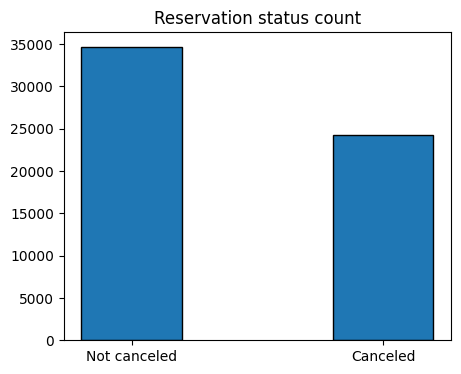

In [ ]:
#is_canceled column data analysis wether the reservation is cancaeled or not its ratio
cancelled_perc=df['is_canceled'].value_counts(normalize=True) 
print(cancelled_perc)
plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.4)
plt.show()

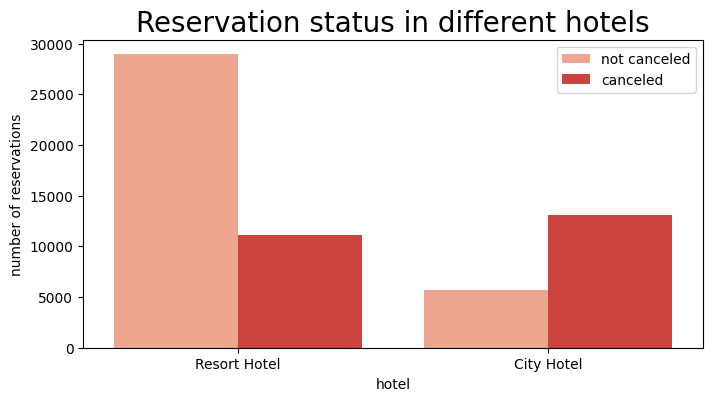

In [ ]:
#cancelation in comparison between resort hotels and city hotels
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Reds')
legend_labels,_ =ax1.get_legend_handles_labels()
ax1.legend(loc='upper right')
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()



In [ ]:
#finding in percentage form the cancelation of resort reservation
resort_hotel= df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

In [ ]:
#finding in percentage form the cancelation of resort reservation
resort_hotel= df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

1    0.696406
0    0.303594
Name: is_canceled, dtype: float64

In [ ]:
#finding mean on city and resort on bases of adr column
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()


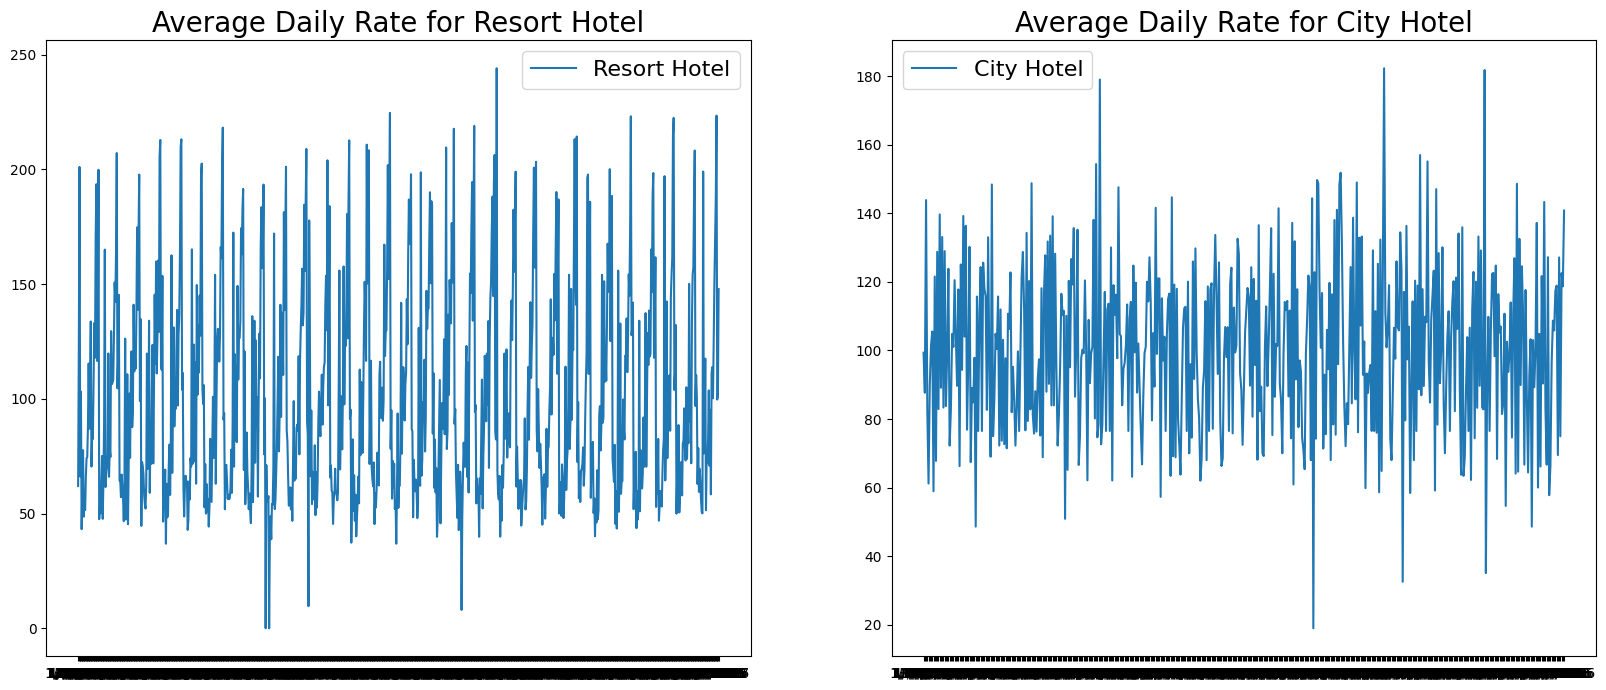

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot for resort hotel
axes[0].set_title('Average Daily Rate for Resort Hotel', fontsize=20)
axes[0].plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
axes[0].legend(fontsize=16)

# Plot for city hotel
axes[1].set_title('Average Daily Rate for City Hotel', fontsize=20)
axes[1].plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
axes[1].legend(fontsize=16)

plt.show()


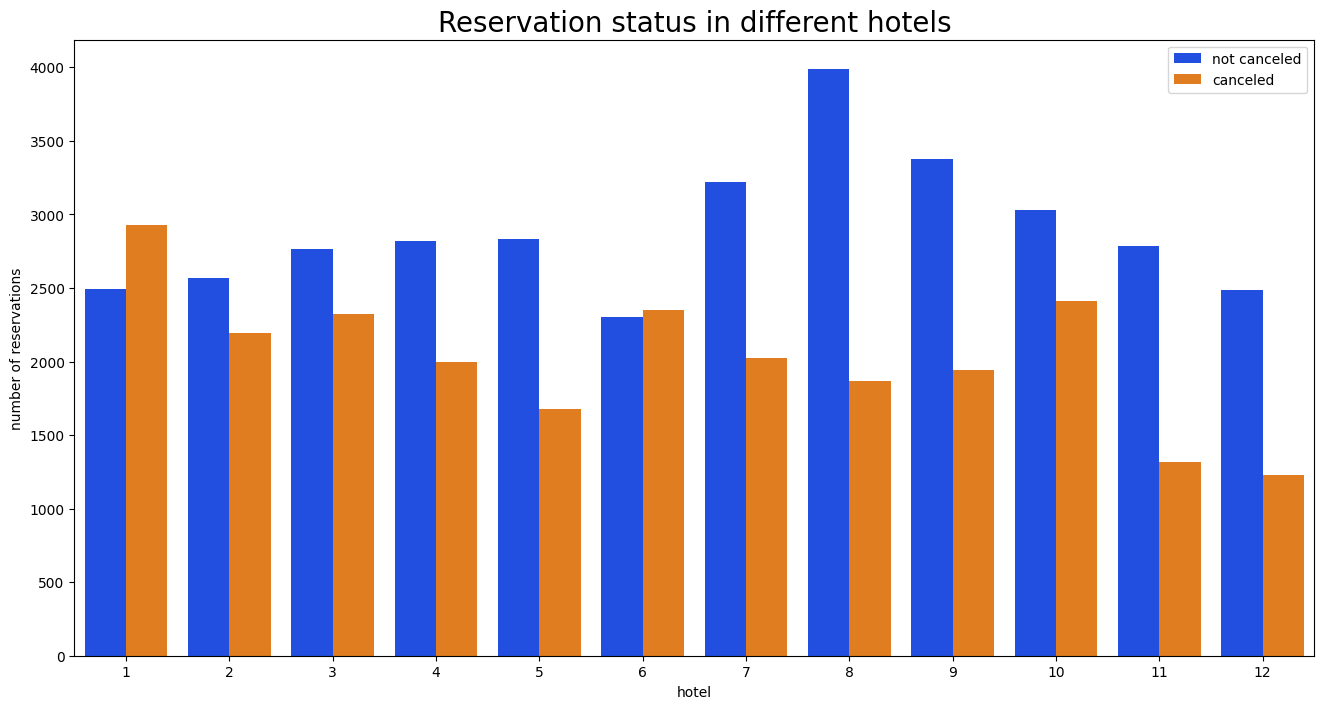

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df,palette='bright')
legend_labels,_ =ax1.get_legend_handles_labels()
ax1.legend(loc='upper right')
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

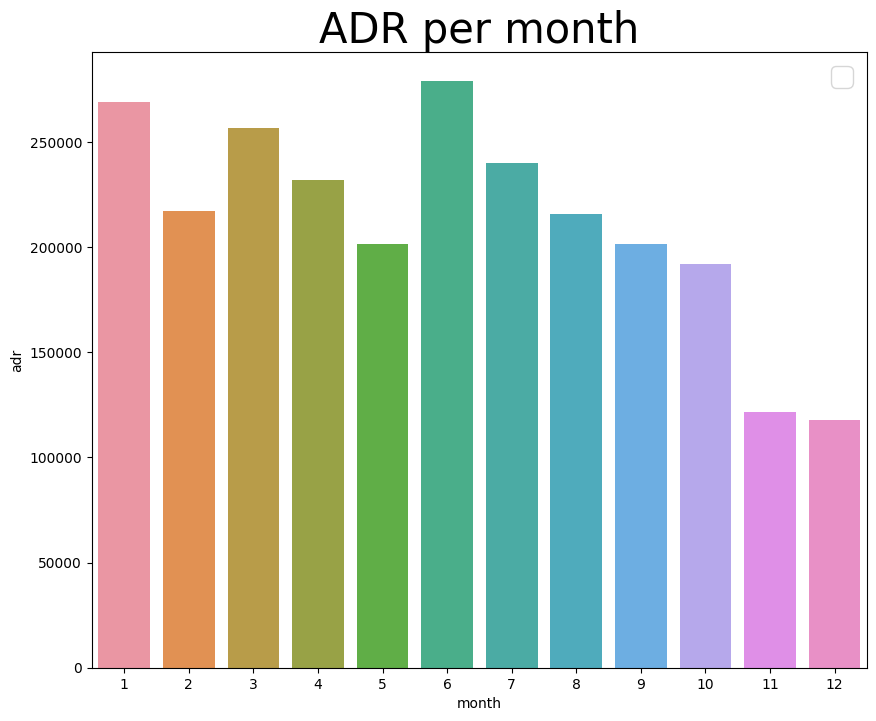

In [ ]:
plt.figure(figsize=(10,8))
plt.title('ADR per month',fontsize=30)
sns.barplot(x='month', y='adr', data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.legend(fontsize=20)
plt.show()


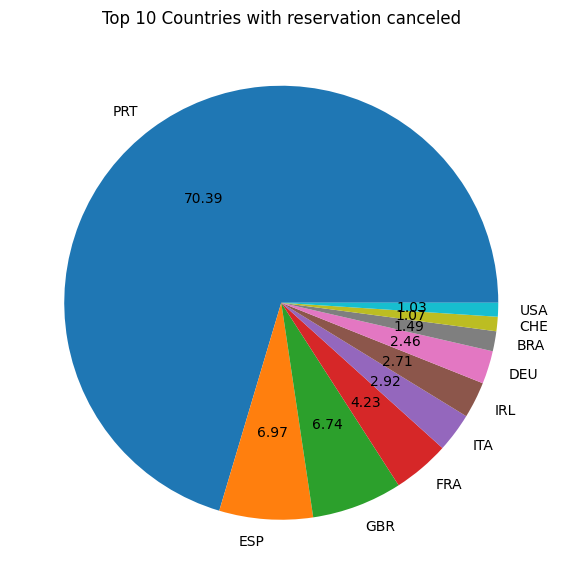

In [ ]:
cancelled_data=df[df['is_canceled']==1]
top_10_country=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(7,8))
plt.title('Top 10 Countries with reservation canceled')
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()


In [ ]:
df['market_segment'].value_counts()

Online TA        25752
Offline TA/TO    12455
Groups           10419
Direct            7399
Corporate         2621
Complementary      254
Aviation            22
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.437038
Offline TA/TO    0.211374
Groups           0.176821
Direct           0.125569
Corporate        0.044481
Complementary    0.004311
Aviation         0.000373
Undefined        0.000034
Name: market_segment, dtype: float64

In [ ]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.494250
Groups           0.228657
Offline TA/TO    0.198030
Direct           0.053794
Corporate        0.022177
Complementary    0.002102
Aviation         0.000907
Undefined        0.000082
Name: market_segment, dtype: float64

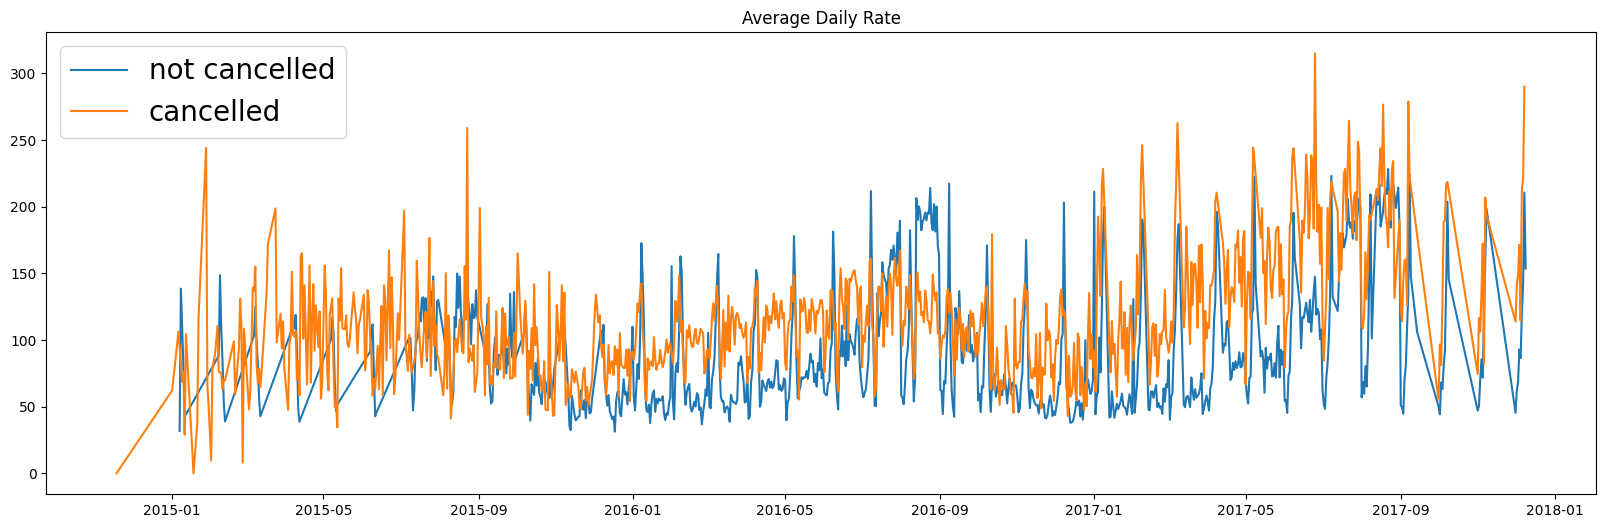

In [ ]:
cancelled_df = df[df['is_canceled'] == 1]
cancelled_df_adr = cancelled_df.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='cancelled')
plt.legend(fontsize=20)
plt.show()
